In [3]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf

from glob import glob
from tqdm import tqdm

import matplotlib.pyplot as plt
from PIL import Image

# Loading the Images

In [5]:
X = []
Y = []

active_subjects_dir = r'train\Active_Subjects'
fatigue_subjects_dir = r'train\Fatigue_Subjects'

# Mencari gambar dalam direktori active_subjects_dir
for file_path in tqdm(glob(os.path.join(active_subjects_dir, '*.*'))):
    temp = np.array(Image.open(file_path).resize((150, 150)))
    X.append(temp)
    Y.append(1)

# Mencari gambar dalam direktori fatigue_subjects_dir
for file_path in tqdm(glob(os.path.join(fatigue_subjects_dir, '*.*'))):
    temp = np.array(Image.open(file_path).resize((150, 150)))
    X.append(temp)
    Y.append(0)

  0%|          | 0/3320 [00:00<?, ?it/s]

100%|██████████| 3169/3169 [00:45<00:00, 68.98it/s] 


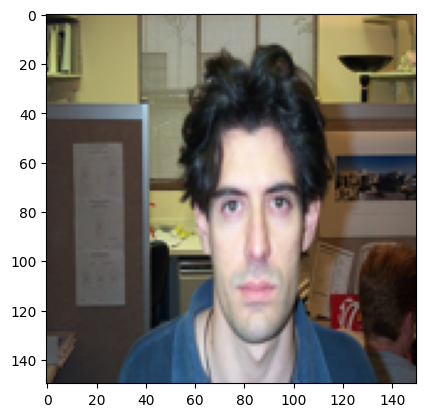

In [6]:
# Pilih gambar dari dataset yang ingin Anda lihat
selected_image = X[99]

# Invers normalisasi: mengalikan kembali dengan 255
# original_image = (selected_image * 255.0).astype('uint8')

# Hilangkan dimensi yang tidak diperlukan jika diperlukan
original_image = selected_image.squeeze()

# Tampilkan gambar
plt.imshow(original_image)
plt.show()

## Normalizing the images (with any algorithm)

In [7]:
X = np.array(X)
X = X/255.0
Y = np.array(Y)

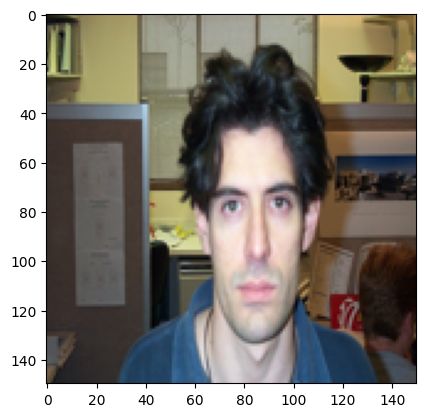

In [8]:
# Pilih gambar dari dataset yang ingin Anda lihat
selected_image = X[99]

# Invers normalisasi: mengalikan kembali dengan 255
# original_image = (selected_image * 255.0).astype('uint8')

# Hilangkan dimensi yang tidak diperlukan jika diperlukan
original_image = selected_image.squeeze()

# Tampilkan gambar
plt.imshow(selected_image)
plt.show()

## Spliting the dataset into training and testing data

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

## CNN Model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, BatchNormalization, MaxPooling2D,Dropout, Flatten

model = tf.keras.models.Sequential([
      Input(shape=(150, 150, 3)),

      Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu'),
      Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu', use_bias=False),
      BatchNormalization(),
      MaxPooling2D(strides = 2),
      Dropout(0.3),

      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu'),
      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu', use_bias=False),
      BatchNormalization(),
      MaxPooling2D(strides = 2),
      Dropout(0.3),

      Flatten(),
      Dense(units  = 128, activation = 'relu', use_bias=False),
      BatchNormalization(),

      Dense(units = 64, use_bias=False, activation = 'relu'),

      Dense(units = 42, use_bias=False, activation = 'relu'),
      BatchNormalization(),
      Dropout(0.3),

      Dense(units = 1, activation = 'sigmoid')
  ])

## Compiling the Model

In [12]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

## Training of the Model

In [27]:
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='bestModel8.h5',
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose =1)
history = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=32, callbacks=callback)


Epoch 1/10
109/109 [==============================] - ETA: 0s - loss: 0.1102 - accuracy: 0.9577
Epoch 1: val_loss improved from inf to 0.35530, saving model to bestModel8.h5
109/109 [==============================] - 224s 2s/step - loss: 0.1102 - accuracy: 0.9577 - val_loss: 0.3553 - val_accuracy: 0.8816
Epoch 2/10
109/109 [==============================] - ETA: 0s - loss: 0.0891 - accuracy: 0.9664
Epoch 2: val_loss improved from 0.35530 to 0.33797, saving model to bestModel8.h5
109/109 [==============================] - 228s 2s/step - loss: 0.0891 - accuracy: 0.9664 - val_loss: 0.3380 - val_accuracy: 0.8920
Epoch 3/10
109/109 [==============================] - ETA: 0s - loss: 0.0877 - accuracy: 0.9701
Epoch 3: val_loss did not improve from 0.33797
109/109 [==============================] - 241s 2s/step - loss: 0.0877 - accuracy: 0.9701 - val_loss: 0.3426 - val_accuracy: 0.8966
Epoch 4/10
109/109 [==============================] - ETA: 0s - loss: 0.0828 - accuracy: 0.9701
Epoch 4: val_

## Model Evaluation

In [28]:
model.evaluate(x_test, y_test)

67/67 [==============================] - 27s 405ms/step - loss: 0.3056 - accuracy: 0.9104


[0.3056364953517914, 0.9103641510009766]

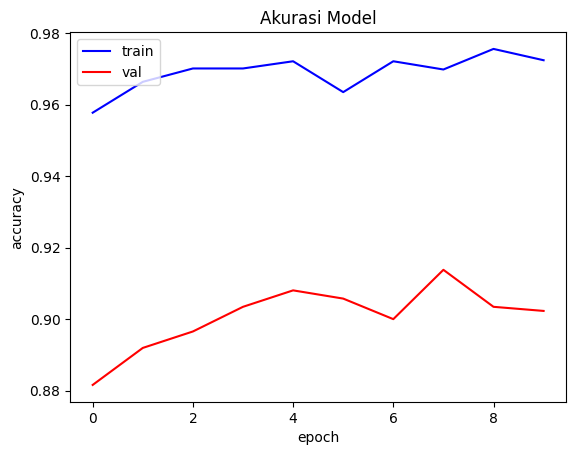

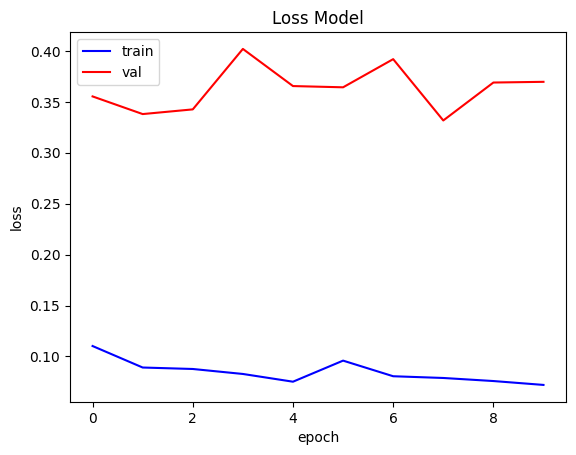

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


plt.plot(acc, color='blue')
plt.plot(val_acc, color='red')
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(loss, color='blue')
plt.plot(val_loss, color='red')
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Loading the Model Performance

In [32]:
from keras.models import load_model
best_model = load_model('bestModel8.h5')
#best_model.evaluate(x_test, y_test)
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 142, 142, 32)      25600     
                                                                 
 batch_normalization (Batch  (None, 142, 142, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 71, 71, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 71, 71, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 69, 69, 64)        1

In [33]:
import pickle

with open('bestModel8.pkl', 'wb') as model_file:
            pickle.dump(model, model_file)

## Changing the dimensions and Plotting the trained images

1/1 [==============================] - 0s 221ms/step


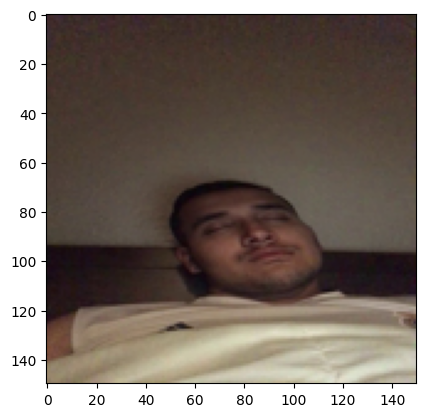

Kelelahan!
1/1 [==============================] - 0s 48ms/step


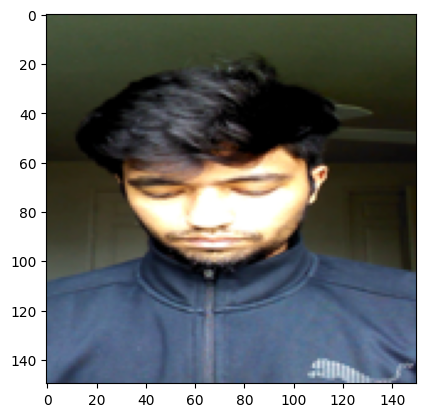

Kelelahan!
1/1 [==============================] - 0s 48ms/step


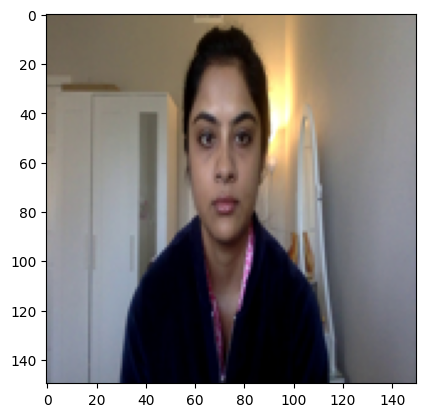

Seger Banget!
1/1 [==============================] - 0s 46ms/step


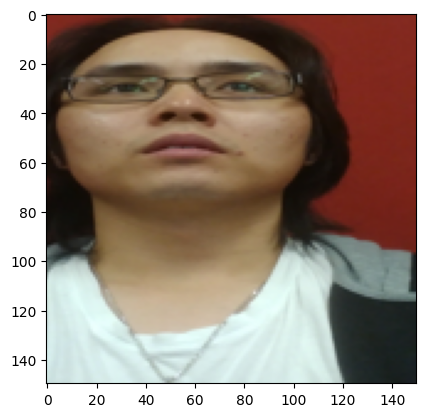

Seger Banget!
1/1 [==============================] - 0s 43ms/step


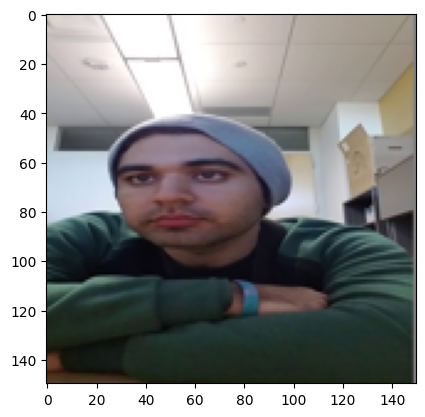

Seger Banget!
1/1 [==============================] - 0s 44ms/step


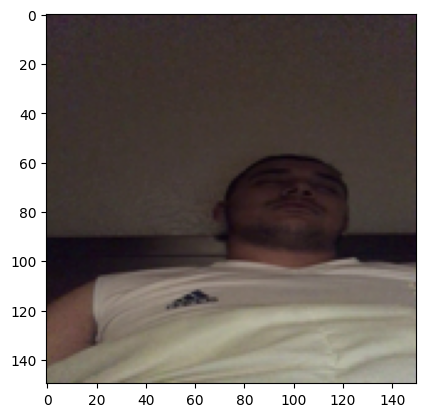

Kelelahan!
1/1 [==============================] - 0s 46ms/step


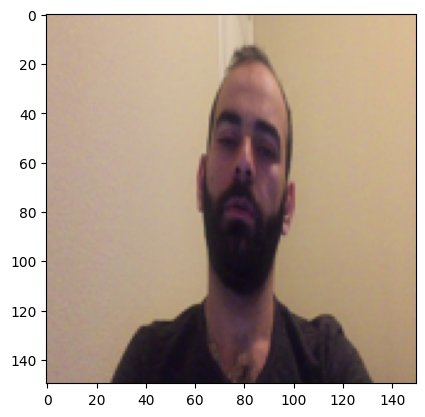

Kelelahan!
1/1 [==============================] - 0s 52ms/step


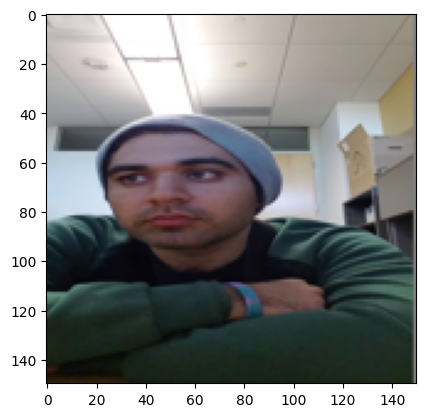

Seger Banget!
1/1 [==============================] - 0s 48ms/step


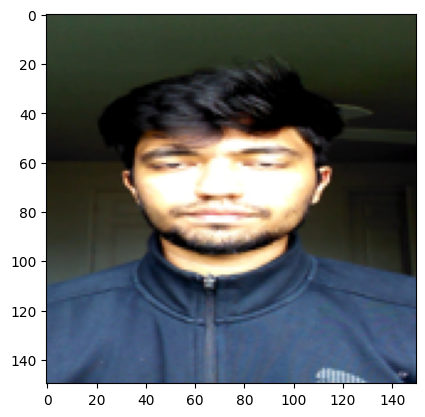

Kelelahan!
1/1 [==============================] - 0s 46ms/step


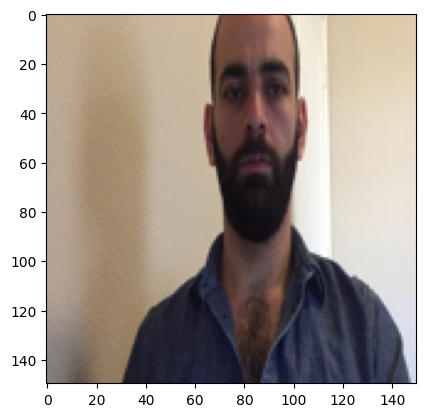

Seger Banget!
1/1 [==============================] - 0s 42ms/step


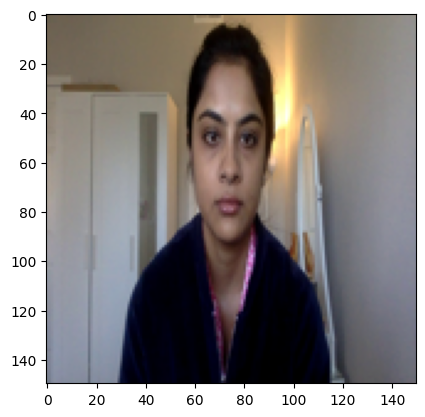

Seger Banget!
1/1 [==============================] - 0s 40ms/step


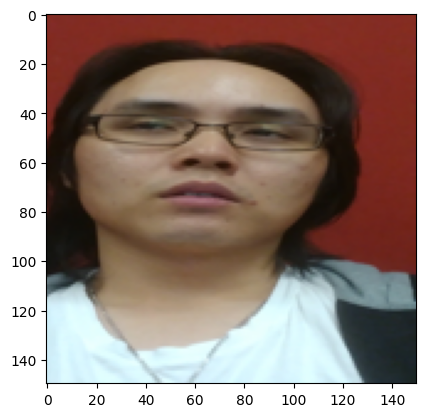

Kelelahan!
1/1 [==============================] - 0s 46ms/step


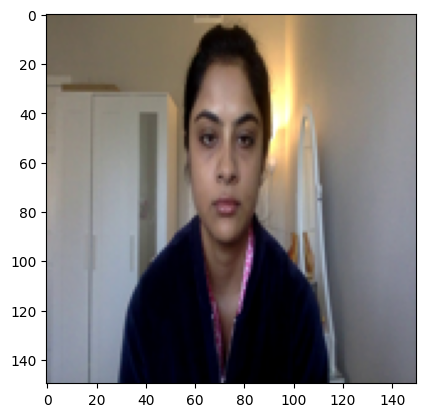

Seger Banget!
1/1 [==============================] - 0s 44ms/step


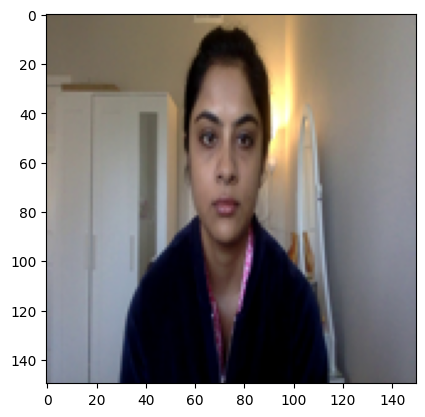

Seger Banget!
1/1 [==============================] - 0s 56ms/step


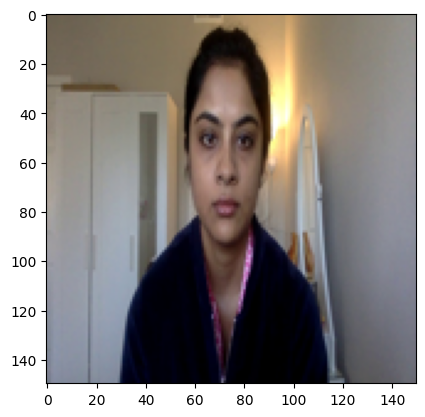

Seger Banget!
1/1 [==============================] - 0s 58ms/step - loss: 4.7292e-04 - accuracy: 1.0000
Sampel 1 - Akurasi: 1.0
Sampel 2 - Akurasi: 1.0
Sampel 3 - Akurasi: 1.0
Sampel 4 - Akurasi: 1.0
Sampel 5 - Akurasi: 1.0
Sampel 6 - Akurasi: 1.0
Sampel 7 - Akurasi: 1.0
Sampel 8 - Akurasi: 1.0
Sampel 9 - Akurasi: 1.0
Sampel 10 - Akurasi: 1.0
Sampel 11 - Akurasi: 1.0
Sampel 12 - Akurasi: 1.0
Sampel 13 - Akurasi: 1.0
Sampel 14 - Akurasi: 1.0
Sampel 15 - Akurasi: 1.0


In [34]:
accuracies = []  # Membuat list untuk menyimpan akurasi

for i, image in enumerate(x_test[0:15]):
    result = best_model.predict(np.expand_dims(image, 0))
    
    # Kembalikan gambar ke dalam rentang [0, 255] dari [0, 1] jika sudah dinormalisasi
    i_display = image.squeeze() * 255 if np.max(image) <= 1 else image.squeeze()
    
    plt.imshow(i_display.astype('uint8'))  # Pastikan tipe data adalah uint8
    plt.show()
    
    if result > 0.5:
        print('Seger Banget!')
    else:
        print('Kelelahan!')
    
    # Mengambil akurasi dari model untuk data saat ini
    accuracy = best_model.evaluate(np.expand_dims(image, 0), np.array([y_test[i]]))[1]
    accuracies.append(accuracy)  # Menyimpan akurasi dalam list

# Mencetak akurasi untuk setiap percobaan
for i, acc in enumerate(accuracies):
    print(f"Sampel {i+1} - Akurasi: {acc}")

## Prediction and Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(15, 5))

preds = best_model.predict(x_test)
preds = (preds >= 0.5).astype(np.int32)
cm = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(cm, index=['closed', 'Open'], columns=['Closed', 'Open'])
plt.subplot(121)
plt.title("Confusion matrix\n")
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.ylabel("Predicted")
plt.xlabel("Actual")

33/67 [=============>................] - ETA: 15s

## Accuracy
Evaluating the Accuracy

In [30]:
accuracy = best_model.evaluate(x_test, y_test)[1]
print("Accuracy:", accuracy)

95/95 [==============================] - 9s 98ms/step - loss: 0.3089 - accuracy: 0.8608
Accuracy: 0.8607973456382751
